- feature: pclass, sex, fare
- label: survived

### 1등급, female, 32달러 인경우 생사유무를 예측하시요 


#### library import

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import recall_score, precision_score, roc_curve, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

#### dataset

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
x_data, y_data = titanic[['pclass', 'sex', 'fare']], titanic['survived']

array([3, 1, 2], dtype=int64)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, stratify=y_data)

#### pipeline 생성

In [23]:
ct = ColumnTransformer([('ohe',OneHotEncoder(sparse=False) ,['pclass', 'sex']),
                        ('scaler', StandardScaler(), ['fare'])])
model = make_pipeline(ct, LogisticRegression())

#### gridsearchcv

In [26]:
param_value = {'logisticregression__C': np.linspace(0,1, 20),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model, param_grid = param_value,
                    scoring='f1' )
gridS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['pclass',
                                                                          'sex']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['fare'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579,

#### best 확인

In [59]:
gridS.best_score_

0.7037896901626199

In [27]:
gridS.best_params_

{'logisticregression__C': 0.05263157894736842,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg'}

#### 1번 결과

In [30]:
xd = pd.DataFrame([[1,'female', 32]], columns=['pclass', 'sex', 'fare'])
xd

,pclass,sex,fare
0,1,female,32


In [31]:
gridS.best_estimator_.predict(xd)

array([1], dtype=int64)

### train, test, f1 score를 구하시오.

##### train

In [36]:
y_train_pred = gridS.best_estimator_.predict(x_train)
print('train f1-score :', f1_score(y_train, y_train_pred))

train f1-score : 0.7016129032258064


In [37]:
y_test_pred = gridS.best_estimator_.predict(x_test)
print('test f1-score :', f1_score(y_test, y_test_pred))

test f1-score : 0.7261904761904763


### confusion matrix를 구하고 heatmap을 그리시오.

##### train

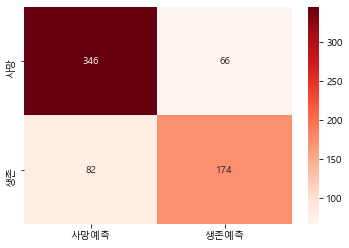

In [41]:
cm = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm, annot=True, cmap='Reds', 
            xticklabels=['사망예측', '생존예측'],
            yticklabels=['사망', '생존'], fmt='d')
plt.show()

##### test

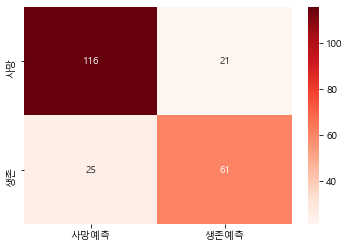

In [42]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Reds', 
            xticklabels=['사망예측', '생존예측'],
            yticklabels=['사망', '생존'], fmt='d')
plt.show()

### roc curve를 그리시오.

##### train

In [55]:
p = gridS.best_estimator_.predict_proba(x_train)

In [56]:
fpr, tpr, thres = roc_curve(y_train, p[:,1])

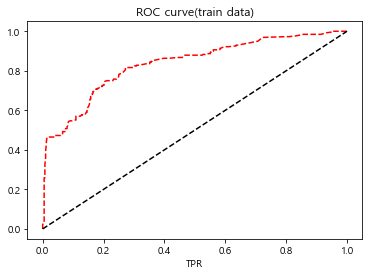

In [57]:
plt.plot(fpr, tpr, 'r--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.title('ROC curve(train data)')
plt.show()

##### test

In [49]:
p = gridS.best_estimator_.predict_proba(x_test)

In [50]:
fpr, tpr, thres = roc_curve(y_test, p[:,1])

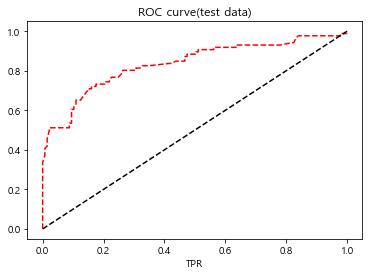

In [52]:
plt.plot(fpr, tpr, 'r--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.title('ROC curve(test data)')
plt.show()

자율문제

### feature에 parch를 추가하고 test데이터의 f1-score를 구하시오.

#### 데이터 분리

In [83]:
x_data, y_data = titanic[['pclass', 'sex', 'fare', 'parch']], titanic['survived']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, stratify=y_data)

#### 모델 생성 및 학습

In [87]:
ct = ColumnTransformer([('ohe',OneHotEncoder(sparse=False) ,['pclass', 'sex']),
                        ('scaler', StandardScaler(), ['fare', 'parch'])])
model = make_pipeline(ct, LogisticRegression())

In [88]:
param_value = {'logisticregression__C': np.linspace(0,1, 20),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model, param_grid = param_value,
                    scoring='f1' )
gridS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['pclass',
                                                                          'sex']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['fare',
                                                                          'parch'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
  

#### 결과

In [89]:
gridS.best_score_

0.7046829586184425

In [90]:
gridS.best_params_

{'logisticregression__C': 0.0,
 'logisticregression__penalty': 'none',
 'logisticregression__solver': 'newton-cg'}

In [91]:
y_pred = gridS.best_estimator_.predict(x_test)

In [92]:
print('test f1-score :', f1_score(y_test, y_pred))

test f1-score : 0.7272727272727273


### VIF 계산

In [109]:
x_tmp = x_data.copy()
x_tmp['sex'] = pd.factorize(x_tmp['sex'])[0]
x_tmp['pclass'] = pd.factorize(x_tmp['pclass'])[0]
x_tmp

,pclass,sex,fare,parch
0,0,0,7.2500,0
1,1,1,71.2833,0
2,0,1,7.9250,0
3,1,1,53.1000,0
4,0,0,8.0500,0
...,...,...,...,...
886,2,0,13.0000,0
887,1,1,30.0000,0
888,0,1,23.4500,2
889,1,0,30.0000,0


In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_tmp.values, i )  for i in range( x_tmp.shape[1] ) ]
vif['features'] = x_tmp.columns
vif

,VIF Factor,features
0,1.418320,pclass
1,1.508392,sex
2,1.497211,fare
3,1.314193,parch


### 생존자는 어느 class에 어느 성별에 많을까

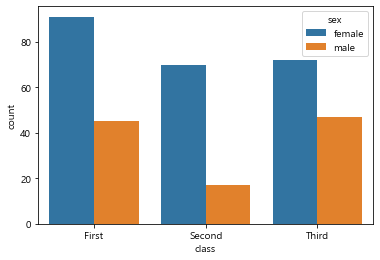

In [81]:
sns.countplot(data=titanic.query('survived==1'), x='class', hue='sex')
plt.show()

* first class의 생존자가 가장 많고 모든 class에서 여자의 생존자가 제일 많다.

### 나이에 따라 생존률이 달라질까?

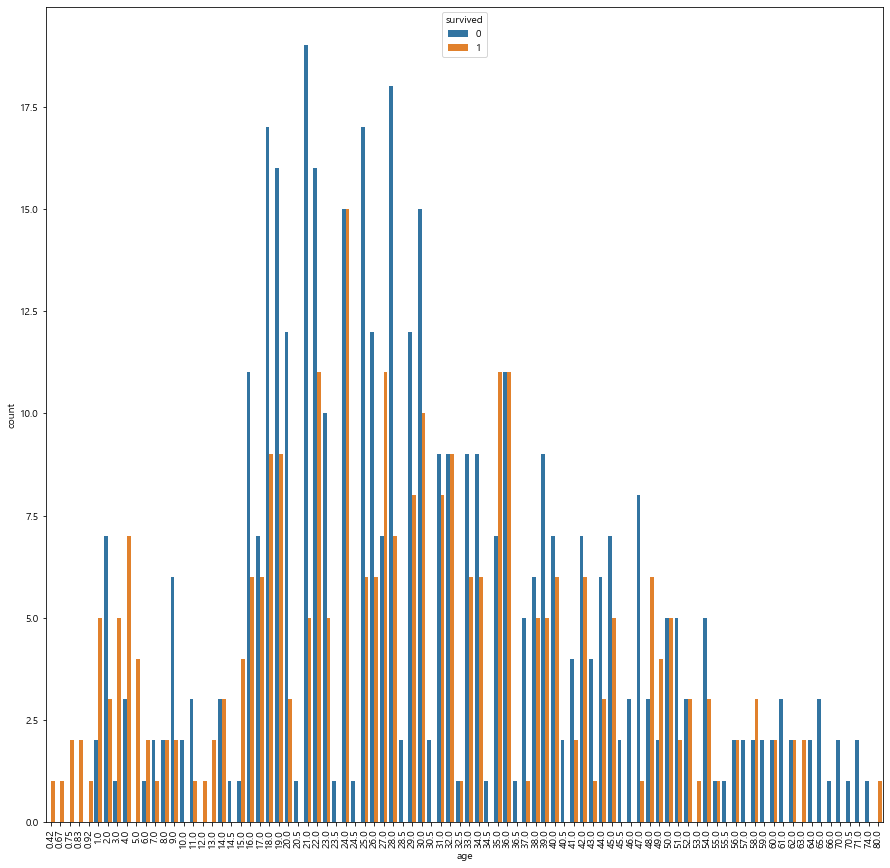

In [125]:
plt.figure(figsize=(15,15))
sns.countplot(data=titanic, x='age', hue='survived')
plt.xticks(rotation=90)
plt.show()

* 나이가 어린부분에서 생존률이 높고 고령은 생존률이 낮다.